# Classifier Prediction

In [78]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
from database import Database

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [79]:
df=Database()
df.head(3)

,Name,Family,FP Exp.,CN Exp.,[H],[CX4H3],[CX4H2],[CX4H1],[CX4H0],[CX3H2],...,[OX2H1][cX3]:[c],[OX2H0],[OX2H0R],[oX2H0](:*):*,[CX3H0]=[O],[CX3H0R]=[O],[CX3H1]=[O],[CX3H0](=[O])[OX2H1],[CX3H0](=[O])[OX2H0],[cX3H0](:*)(:*):*
0,"(2E)-but-2-ene-1,4-diol",Alcohols,401.15,NaN,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(2R,3R,4R,5S)-hexane-1,2,3,4,5,6-hexol",Alcohols,422.00,NaN,14,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(2S)-butane-1,2,4-triol",Alcohols,385.00,NaN,10,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
col= ["[H]", "[CX4H3]", "[CX4H2]", "[CX4H1]", "[CX4H0]","[CX3H2]", "[CX3H1]", "[CX3H0]", "[CX2H1]","[CX2H0]", "[CX4H2R]", "[CX4H1R]", "[CX4H0R]","[CX3H1R]","[CX3H0R]","[cX3H1](:*):*", "[cX3H0](:*)(:*)*", "[OX2H1]", "[OX2H1][cX3]:[c]", "[OX2H0]", "[OX2H0R]", "[oX2H0](:*):*", "[CX3H0]=[O]", "[CX3H0R]=[O]", "[CX3H1]=[O]", "[CX3H0](=[O])[OX2H1]", "[CX3H0](=[O])[OX2H0]", "[cX3H0](:*)(:*):*"]

In [137]:
df.head(3) 

,Name,Family,FP Exp.,CN Exp.,[H],[CX4H3],[CX4H2],[CX4H1],[CX4H0],[CX3H2],...,[OX2H1][cX3]:[c],[OX2H0],[OX2H0R],[oX2H0](:*):*,[CX3H0]=[O],[CX3H0R]=[O],[CX3H1]=[O],[CX3H0](=[O])[OX2H1],[CX3H0](=[O])[OX2H0],[cX3H0](:*)(:*):*
0,"(2E)-but-2-ene-1,4-diol",Alcohols,401.15,NaN,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(2R,3R,4R,5S)-hexane-1,2,3,4,5,6-hexol",Alcohols,422.00,NaN,14,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(2S)-butane-1,2,4-triol",Alcohols,385.00,NaN,10,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.loc[:, '[H]': '[cX3H0](:*)(:*):*']
y, labels=pd.factorize(df.Family)

X_train = train.loc[:, '[H]': '[cX3H0](:*)(:*):*']
y_train, y_train_labels = pd.factorize(train.Family)

X_test = test.loc[:, '[H]': '[cX3H0](:*)(:*):*']
y_test, y_test_labels = pd.factorize(test.Family)

### The following are classifiers with multilabel multiclass algorithms 
* sklearn.tree.DecisionTreeClassifier
* sklearn.tree.ExtraTreeClassifier
* sklearn.ensemble.ExtraTreesClassifier
* sklearn.neural_network.MLPClassifier
* sklearn.neighbors.RadiusNeighborsClassifier
* sklearn.ensemble.RandomForestClassifier
* sklearn.linear_model.RidgeClassifierCV

### ANN

In [117]:
def KNN():
    clf= KNeighborsClassifier(algorithm='brute',n_neighbors=50)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    return Y_pred

In [118]:
Y_pred1=KNN()

In [119]:
accuracy_score(Y_test,Y_pred1)

0.051724137931034482

In [120]:
MSE=metrics.mean_squared_error(Y_test,Y_pred1)
MSE

5.8103448275862073

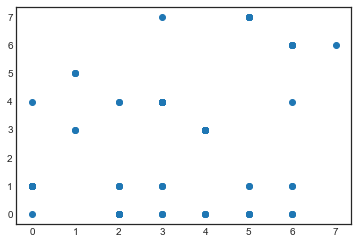

In [121]:
plt.scatter(Y_test,Y_pred1)

### K-Mean

In [122]:
def K_mean():
    clf2= KMeans()
    clf2.fit(X_train,Y_train)
    Y_pred2=clf2.predict(X_test)
    return Y_pred2

In [123]:
Y_pred2=K_mean()

In [124]:
MSE=metrics.mean_squared_error(Y_test,Y_pred2)
MSE

10.28448275862069

In [125]:
metrics.r2_score(Y_test,Y_pred2)

-1.5047148467901037

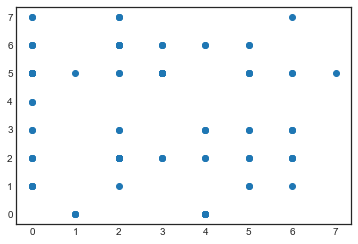

In [126]:
plt.scatter(Y_test,Y_pred2)

### SVM

In [127]:
clf3=SVC()
clf3.fit(X_train,Y_train)
Y_pred3=clf3.predict(X_test)
clf3.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [128]:
clear

In [129]:
MSE=metrics.mean_squared_error(Y_test,Y_pred3)
MSE

3.6982758620689653

In [130]:
metrics.r2_score(Y_test,Y_pred3)

0.099310419720909926

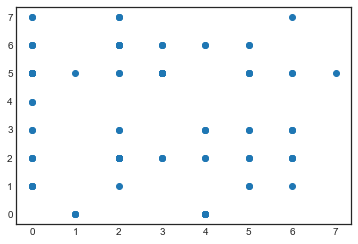

In [131]:
plt.scatter(Y_test,Y_pred2)

### MLP

In [132]:
def MLP():
    # Now apply the transformations to the data:
    mlp =neural_network.MLPClassifier(hidden_layer_sizes=(30,30,30))
    mlp.fit(X_train,Y_train)
    Y_pred4=mlp.predict(X_test)
    return Y_pred4

In [133]:
Y_pred4=MLP()

In [134]:
MSE=metrics.mean_squared_error(Y_test,Y_pred4)
MSE

2.9396551724137931

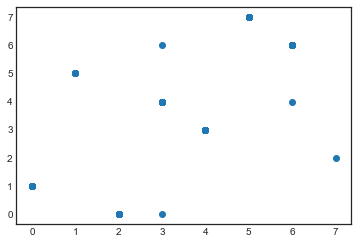

In [135]:
plt.scatter(Y_test,Y_pred4)